In [1]:
from cryoS2Sdrop.analyze import *

PARENT_PATH = setup.PARENT_PATH

pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_columns', 50)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# Tomophantom all versions image

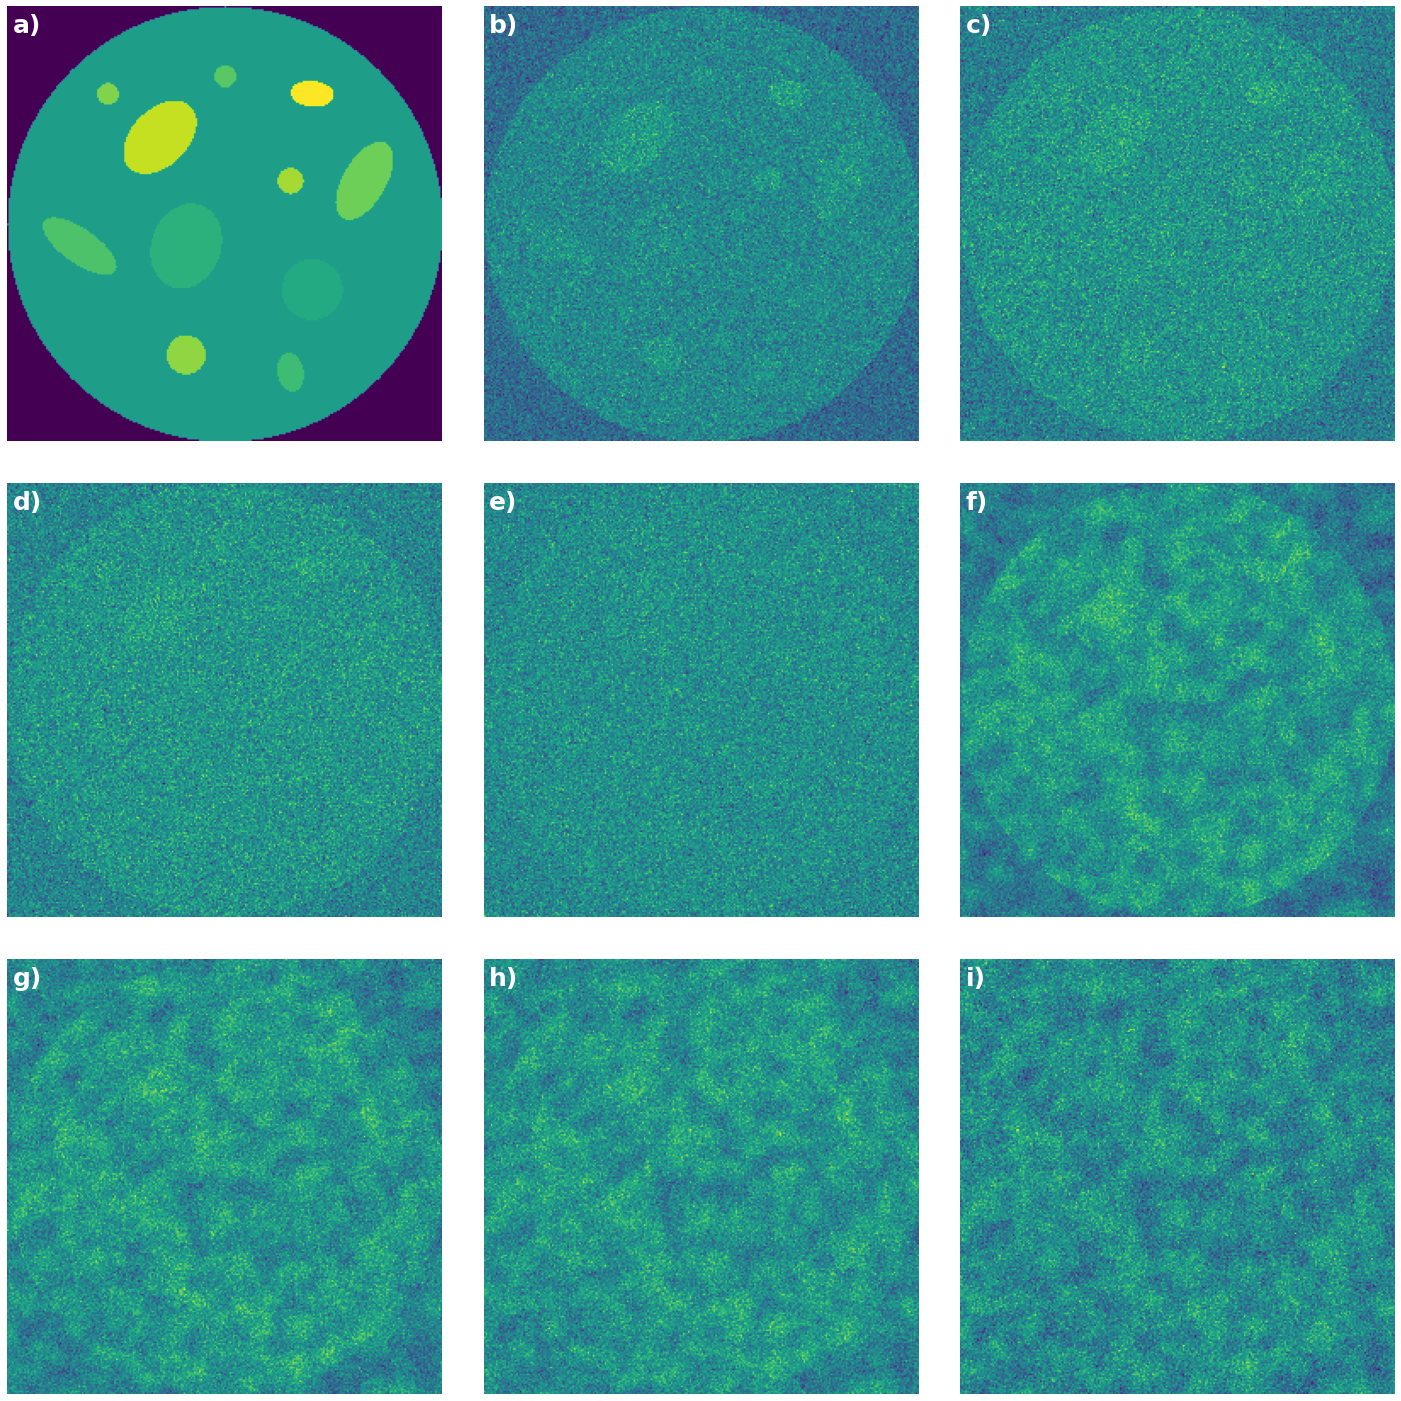

In [20]:
tomogram_list = [
    "tomoPhantom_model14",
    "tomoPhantom_model14_noisyGaussPoissVL",
    "tomoPhantom_model14_noisyGaussPoissL",
    "tomoPhantom_model14_noisyGaussPoissM",
    "tomoPhantom_model14_noisyGaussPoissH",
    "tomoPhantom_model14_noisyGaussPoissVL_Perlin",
    "tomoPhantom_model14_noisyGaussPoissL_Perlin",
    "tomoPhantom_model14_noisyGaussPoissM_Perlin",
    "tomoPhantom_model14_noisyGaussPoissH_Perlin"
]

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.ravel()
plt.tight_layout()
n = 0
for tomo, my_ax in zip(tomogram_list, ax):
    data = read_array(os.path.join(PARENT_PATH, "data/S2SDenoising/dummy_tomograms/%s.mrc" %tomo))
    data = data[len(data)//2]
    my_ax.set_axis_off()
    my_ax.imshow(data)
    my_ax.text(0.0125, 0.94, string.ascii_lowercase[n]+')', transform=my_ax.transAxes, size=25, weight='bold', color='white')
    n+=1
    
plt.show()

# Tomophantom all models

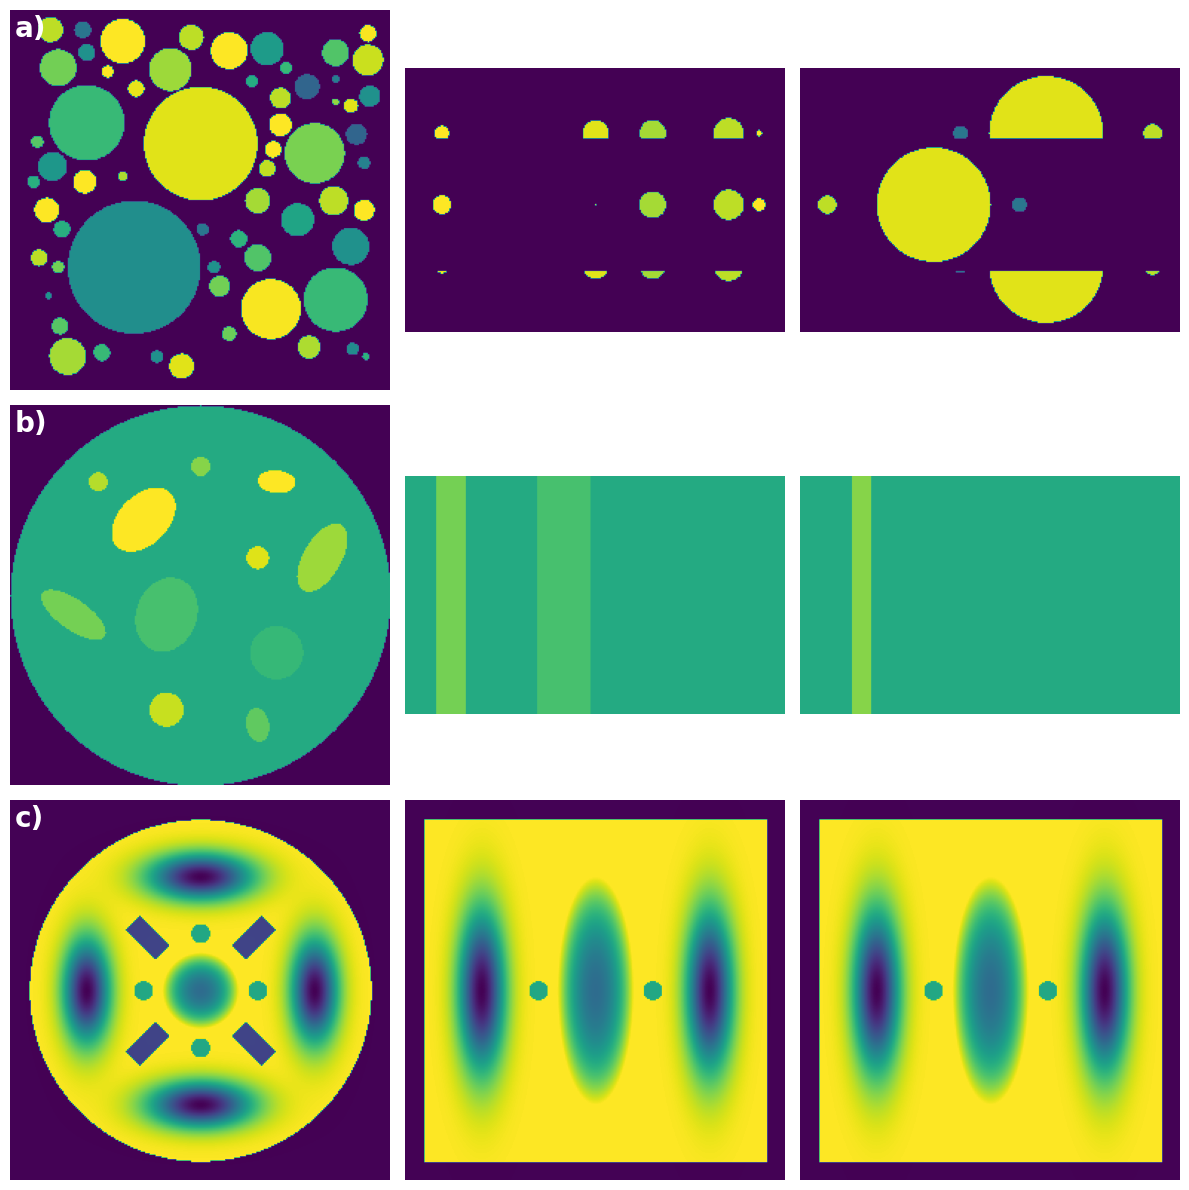

In [35]:
tomogram_list = [
    "tomoPhantom_model8",
    "tomoPhantom_model14",
    "tomoPhantom_model16"
]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))

plt.tight_layout()
for i, tomo in enumerate(tomogram_list):
    
    data = read_array(os.path.join(PARENT_PATH, "data/S2SDenoising/dummy_tomograms/%s.mrc" %tomo))
    data = standardize(clip(data))
    data = scale(data)
    zidx, yidx, xidx = np.array(data.shape)//2
    
    my_ax = ax[i]
    
    my_ax[0].imshow(data[zidx], vmin=0, vmax=1)
    my_ax[1].imshow(data[:, yidx, :], vmin=0, vmax=1)
    my_ax[2].imshow(data[:, :, xidx], vmin=0, vmax=1)
    
    my_ax[0].text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=my_ax[0].transAxes, size=20, weight='bold', color='white')

    
plt.show()

# Metrics table from RealBernoulli experiments

In [ ]:
tomo_list = [
    'tomoPhantom_model8_noisyGaussPoissVL',
    'tomoPhantom_model8_noisyGaussPoissL',
    'tomoPhantom_model8_noisyGaussPoissM',
    'tomoPhantom_model8_noisyGaussPoissH',
    'tomoPhantom_model14_noisyGaussPoissVL',
    'tomoPhantom_model14_noisyGaussPoissL',
    'tomoPhantom_model14_noisyGaussPoissM',
    'tomoPhantom_model14_noisyGaussPoissH',
    'tomoPhantom_model16_noisyGaussPoissVL',
    'tomoPhantom_model16_noisyGaussPoissL',
    'tomoPhantom_model16_noisyGaussPoissM',
    'tomoPhantom_model16_noisyGaussPoissH'
            ]

data_log = []

for tomo in tqdm(tomo_list):
    logdir = 'data/S2SDenoising/model_logs/%s/realBernoulli_dropoutLevel_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log = data_log.reset_index().drop('index', 1)
data_log.head()

In [13]:
df = data_log[['tomo_name', 'noise_level', 'p', 'full_tomo_ssim', 'n2v_ssim', 'full_tomo_psnr', 'n2v_psnr']]
df.columns = ['Model', 'Noise', 'p', 'SSIM', 'N2V SSIM', 'PSNR', 'N2V PSNR']
df = df.groupby(['Model', 'Noise', 'p'])['SSIM', 'N2V SSIM', 'PSNR', 'N2V PSNR'].mean()
# df.style.highlight_max(color = 'lightgreen', axis = 0)
df

SSIM  N2V SSIM   PSNR  N2V PSNR
Model     Noise                p                                   
blobs     Gauss(0.2) + Poisson 0.1 0.184     0.094 18.575    13.666
                               0.3 0.190     0.094 18.766    13.666
                               0.5 0.201     0.094 20.658    13.666
                               0.7 0.189     0.094 20.389    13.666
          Gauss(0.5) + Poisson 0.1 0.178     0.084 19.466    14.857
                               0.3 0.179     0.084 18.733    14.857
                               0.5 0.185     0.084 19.928    14.857
                               0.7 0.183     0.084 20.302    14.857
          Gauss(1.0) + Poisson 0.1 0.162     0.026 18.031     8.316
                               0.3 0.154     0.026 19.358     8.316
                               0.5 0.190     0.026 20.097     8.316
                               0.7 0.185     0.026 20.084     8.316
          Gauss(5.0) + Poisson 0.1 0.152     0.009 17.807     5.403
                               0.3 0.160     0.009 18.877     5.403
                               0.5 0.180     0.009 18.835     5.403
                               0.7 0.206     0.009 19.463     5.403
cell      Gauss(0.2) + Poisson 0.1 0.782     0.173 21.650    17.529
                               0.3 0.772     0.173 21.286    17.529
                               0.5 0.775     0.173 21.152    17.529
                               0.7 0.766     0.173 21.045    17.529
          Gauss(0.5) + Poisson 0.1 0.769     0.033 20.547    11.009
                               0.3 0.763     0.033 20.990    11.009
                               0.5 0.765     0.033 21.241    11.009
                               0.7 0.761     0.033 21.618    11.009
          Gauss(1.0) + Poisson 0.1 0.750     0.050 20.517    12.812
                               0.3 0.743     0.050 19.721    12.812
                               0.5 0.734     0.050 19.698    12.812
                               0.7 0.746     0.050 20.129    12.812
          Gauss(5.0) + Poisson 0.1 0.722     0.019 20.061     9.416
                               0.3 0.698     0.019 18.445     9.416
                               0.5 0.720     0.019 18.804     9.416
                               0.7 0.714     0.019 19.584     9.416
spaceship Gauss(0.2) + Poisson 0.1 0.643     0.560 17.506    21.192
                               0.3 0.649     0.560 18.743    21.192
                               0.5 0.658     0.560 20.491    21.192
                               0.7 0.661     0.560 21.609    21.192
          Gauss(0.5) + Poisson 0.1 0.623     0.391 16.422    18.651
                               0.3 0.633     0.391 17.903    18.651
                               0.5 0.641     0.391 19.597    18.651
                               0.7 0.643     0.391 19.970    18.651
          Gauss(1.0) + Poisson 0.1 0.613     0.241 16.917    14.510
                               0.3 0.617     0.241 17.977    14.510
                               0.5 0.622     0.241 19.513    14.510
                               0.7 0.627     0.241 19.948    14.510
          Gauss(5.0) + Poisson 0.1 0.593     0.012 17.163     5.623
                               0.3 0.606     0.012 18.098     5.623
                               0.5 0.613     0.012 18.856     5.623
                               0.7 0.586     0.012 19.088     5.623

In [14]:
print(df.to_latex())

\begin{tabular}{lllrrrr}
\toprule
          &                      &     &  SSIM &  N2V SSIM &   PSNR &  N2V PSNR \\
Model & Noise & p &       &           &        &           \\
\midrule
blobs & Gauss(0.2) + Poisson & 0.1 & 0.184 &     0.094 & 18.575 &    13.666 \\
          &                      & 0.3 & 0.190 &     0.094 & 18.766 &    13.666 \\
          &                      & 0.5 & 0.201 &     0.094 & 20.658 &    13.666 \\
          &                      & 0.7 & 0.189 &     0.094 & 20.389 &    13.666 \\
          & Gauss(0.5) + Poisson & 0.1 & 0.178 &     0.084 & 19.466 &    14.857 \\
          &                      & 0.3 & 0.179 &     0.084 & 18.733 &    14.857 \\
          &                      & 0.5 & 0.185 &     0.084 & 19.928 &    14.857 \\
          &                      & 0.7 & 0.183 &     0.084 & 20.302 &    14.857 \\
          & Gauss(1.0) + Poisson & 0.1 & 0.162 &     0.026 & 18.031 &     8.316 \\
          &                      & 0.3 & 0.154 &     0.026 & 19.358 &

In [90]:
df = data_log.groupby(['tomo_name', 'noise_level', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['tomo_name', 'noise_level'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['tomo_name', 'noise_level', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['tomo_name', 'noise_level', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

In [ ]:
df

tomo_name           noise_level        p  full_tomo_ssim  full_tomo_psnr
0       blobs  Gauss(0.2) + Poisson      0.1           0.184          18.575
1       blobs  Gauss(0.2) + Poisson      0.3           0.190          18.766
2       blobs  Gauss(0.2) + Poisson      0.5           0.201          20.658
3       blobs  Gauss(0.2) + Poisson      0.7           0.189          20.389
4       blobs  Gauss(0.5) + Poisson      0.1           0.178          19.466
5       blobs  Gauss(0.5) + Poisson      0.3           0.179          18.733
6       blobs  Gauss(0.5) + Poisson      0.5           0.185          19.928
7       blobs  Gauss(0.5) + Poisson      0.7           0.183          20.302
8       blobs  Gauss(1.0) + Poisson      0.1           0.162          18.031
9       blobs  Gauss(1.0) + Poisson      0.3           0.154          19.358
10      blobs  Gauss(1.0) + Poisson      0.5           0.190          20.097
11      blobs  Gauss(1.0) + Poisson      0.7           0.185          20.084
12      blobs  Gauss(5.0) + Poisson      0.1           0.152          17.807
13      blobs  Gauss(5.0) + Poisson      0.3           0.160          18.877
14      blobs  Gauss(5.0) + Poisson      0.5           0.180          18.835
15      blobs  Gauss(5.0) + Poisson      0.7           0.206          19.463
16       cell  Gauss(0.2) + Poisson      0.1           0.782          21.650
17       cell  Gauss(0.2) + Poisson      0.3           0.772          21.286
18       cell  Gauss(0.2) + Poisson      0.5           0.775          21.152
19       cell  Gauss(0.2) + Poisson      0.7           0.766          21.045
20       cell  Gauss(0.5) + Poisson      0.1           0.769          20.547
21       cell  Gauss(0.5) + Poisson      0.3           0.763          20.990
22       cell  Gauss(0.5) + Poisson      0.5           0.765          21.241
23       cell  Gauss(0.5) + Poisson      0.7           0.761          21.618
24       cell  Gauss(1.0) + Poisson      0.1           0.750          20.517
25       cell  Gauss(1.0) + Poisson      0.3           0.743          19.721
26       cell  Gauss(1.0) + Poisson      0.5           0.734          19.698
27       cell  Gauss(1.0) + Poisson      0.7           0.746          20.129
28       cell  Gauss(5.0) + Poisson      0.1           0.722          20.061
29       cell  Gauss(5.0) + Poisson      0.3           0.698          18.445
30       cell  Gauss(5.0) + Poisson      0.5           0.720          18.804
31       cell  Gauss(5.0) + Poisson      0.7           0.714          19.584
32  spaceship  Gauss(0.2) + Poisson      0.1           0.643          17.506
33  spaceship  Gauss(0.2) + Poisson      0.3           0.649          18.743
34  spaceship  Gauss(0.2) + Poisson      0.5           0.658          20.491
35  spaceship  Gauss(0.2) + Poisson      0.7           0.661          21.609
36  spaceship  Gauss(0.5) + Poisson      0.1           0.623          16.422
37  spaceship  Gauss(0.5) + Poisson      0.3           0.633          17.903
38  spaceship  Gauss(0.5) + Poisson      0.5           0.641          19.597
39  spaceship  Gauss(0.5) + Poisson      0.7           0.643          19.970
40  spaceship  Gauss(1.0) + Poisson      0.1           0.613          16.917
41  spaceship  Gauss(1.0) + Poisson      0.3           0.617          17.977
42  spaceship  Gauss(1.0) + Poisson      0.5           0.622          19.513
43  spaceship  Gauss(1.0) + Poisson      0.7           0.627          19.948
44  spaceship  Gauss(5.0) + Poisson      0.1           0.593          17.163
45  spaceship  Gauss(5.0) + Poisson      0.3           0.606          18.098
46  spaceship  Gauss(5.0) + Poisson      0.5           0.613          18.856
47  spaceship  Gauss(5.0) + Poisson      0.7           0.586          19.088
0       blobs  Gauss(0.2) + Poisson  N2V Ref           0.094          13.666
1       blobs  Gauss(0.5) + Poisson  N2V Ref           0.084          14.857
2       blobs  Gauss(1.0) + Poisson  N2V Ref           0.026           8.316


cell
blobs
spaceship


Text(775.3131313131312, 0.5, '')

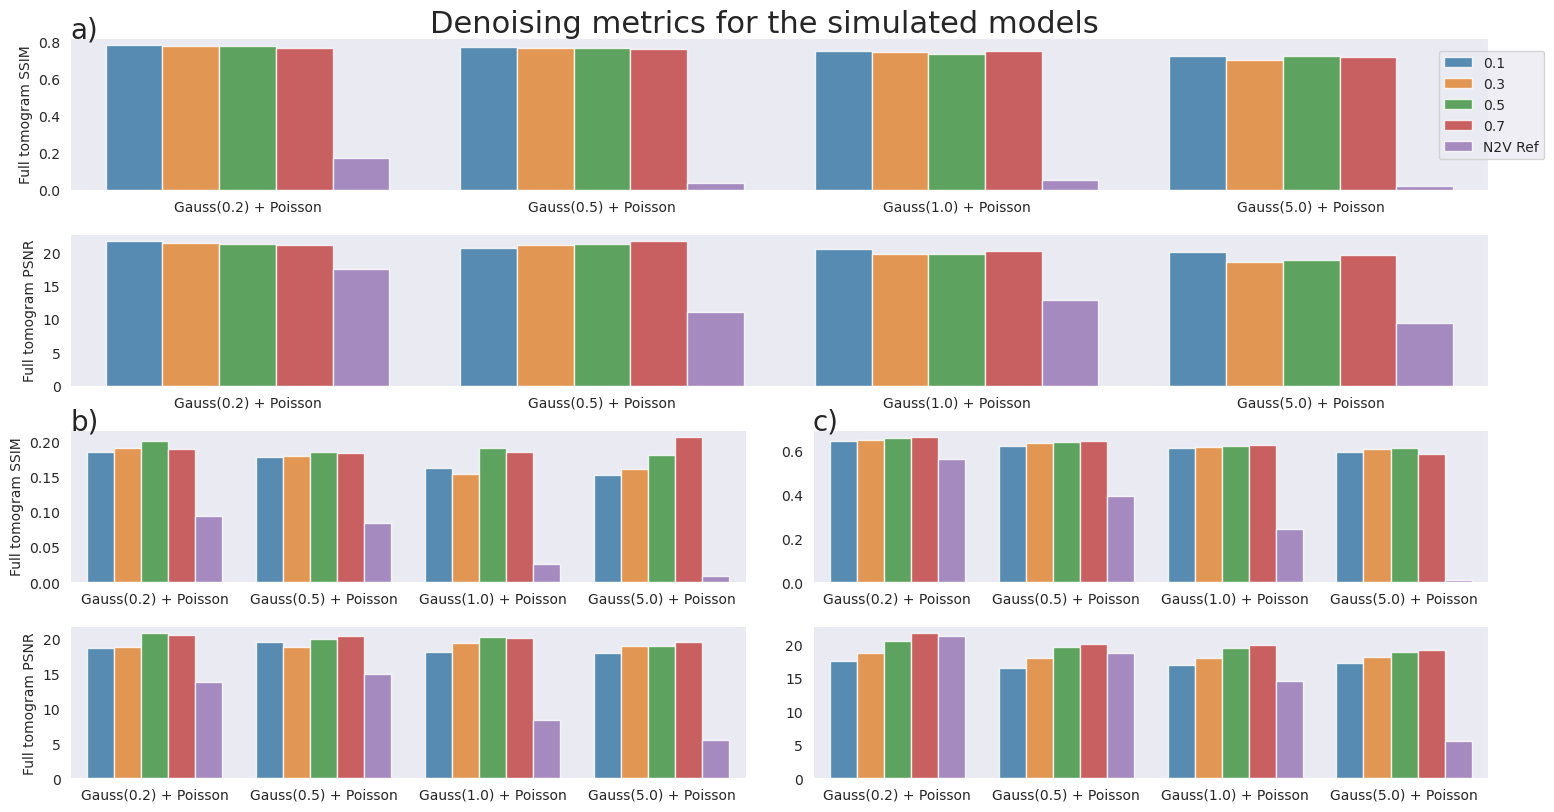

In [92]:
plt.figure(figsize=(15, 8), dpi=100)
grid = plt.GridSpec(4, 2)

ax0 = plt.subplot(grid[0, :])
ax1 = plt.subplot(grid[1, :])
ax2 = plt.subplot(grid[2, 0])
ax3 = plt.subplot(grid[3, 0])
ax4 = plt.subplot(grid[2, 1])
ax5 = plt.subplot(grid[3, 1])

plt.tight_layout()
plt.suptitle('Denoising metrics for the tomoPhantom images', y=1.01, size=22)

axs = [[ax0, ax1], [ax2, ax3], [ax4, ax5]]
ns = ['cell', 'blobs', 'spaceship']

i = 0
for n, ax in zip(ns, axs):
    print(n)
    aux = df[df.tomo_name==n]
    name = aux.tomo_name.values[0]

    sns.barplot(data=aux, hue='p', y='full_tomo_ssim', x='noise_level', ax=ax[0], alpha=0.8)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Full tomogram SSIM', fontsize=10)
    ax[0].legend(bbox_to_anchor=(0.96, 0.96))
    ax[0].text(0, 1, string.ascii_lowercase[i]+')', transform=ax[0].transAxes, size=20)

    
    sns.barplot(data=aux, hue='p', y='full_tomo_psnr', x='noise_level', ax=ax[1], alpha=0.8)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Full tomogram PSNR', fontsize=10)
    ax[1].get_legend().remove()
    i+=1
    

ax2.set_xlabel('')
ax2.get_legend().remove()
ax2.set_ylabel('Full tomogram SSIM', fontsize=10)

ax3.set_xlabel('')
ax3.set_ylabel('Full tomogram PSNR', fontsize=10)

ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.get_legend().remove()

ax5.set_xlabel('')
ax5.set_ylabel('')

